# Sentiment Analysis Using NLTK and Tensorflow Keras

In [2]:
import matplotlib_inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
df = pd.read_csv("market_comments.csv")
df.head()

,item_category,item_id,brand,user_id,date,comment,rating,tonality
0,401,4010201,826,2217,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",2.0,negative
1,403,4030101,1425,1026,2010-07-04,Через 2 месяца после истечении гарантийного ср...,2.0,negative
2,401,4010401,124,2769,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,4.0,positive
3,203,2030301,93,508,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,5.0,positive
4,205,2050201,656,1049,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",5.0,positive


In [4]:
df.shape

(14281, 8)

In [5]:
df.isnull().sum()

item_category    0
item_id          0
brand            0
user_id          0
date             0
comment          0
rating           0
tonality         0
dtype: int64

Focusing on only the comments and tonality for the sake of sentiment analysis

In [6]:
comment = df["comment"]
tonality = df["tonality"]

In [7]:
tonality.value_counts()

tonality
positive    11952
negative     2329
Name: count, dtype: int64

## Using NLTK

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#### Trying out NLTK

In [9]:
sentence = "Hey, I am learning Natural Language Processing"
words = word_tokenize(sentence)
print("Tokenized words: ", words)
tagged = nltk.pos_tag(words)
print("Tagged words:", tagged)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
print("Stemmed words:", stemmed_words)
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered words:", filtered_words)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
score = analyzer.polarity_scores("I hate you")
print("Sentiment score:", score)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
score_vader = analyzer.polarity_scores("I hate you")
print("Sentiment score vader:", score_vader)

Tokenized words:  ['Hey', ',', 'I', 'am', 'learning', 'Natural', 'Language', 'Processing']
Tagged words: [('Hey', 'NNP'), (',', ','), ('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP')]
Stemmed words: ['hey', ',', 'i', 'am', 'learn', 'natur', 'languag', 'process']
Filtered words: ['Hey', ',', 'learning', 'Natural', 'Language', 'Processing']
Sentiment score: {'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}
Sentiment score vader: {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}


## Using Tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
tonality = encoder.fit_transform(tonality)

In [12]:
tonality

array([0, 0, 1, ..., 1, 0, 1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(comment, tonality, test_size=0.2, random_state=42)

In [14]:
token = Tokenizer(num_words=10000)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=100, padding='post')
X_test = pad_sequences(X_test, maxlen=100, padding='post')

### Building Model

In [15]:
model = Sequential(
    [
        Embedding(10000, 128),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
epochs = 8
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.8345 - loss: 0.4779 - val_accuracy: 0.8327 - val_loss: 0.4515
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.8347 - loss: 0.4582 - val_accuracy: 0.8323 - val_loss: 0.4536
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.8469 - loss: 0.4365 - val_accuracy: 0.8320 - val_loss: 0.4528
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.8408 - loss: 0.4388 - val_accuracy: 0.8323 - val_loss: 0.4486
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.8584 - loss: 0.3450 - val_accuracy: 0.9009 - val_loss: 0.2623
Epoch 6/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.9409 - loss: 0.1656 - val_accuracy: 0.9002 - val_loss: 0.2522
Epoch 7/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.9709 - loss: 0.0868 - val_accuracy: 0.8999 - val_loss: 0.2554
Epoch 8/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9869 - loss: 0.0516 - val_ac

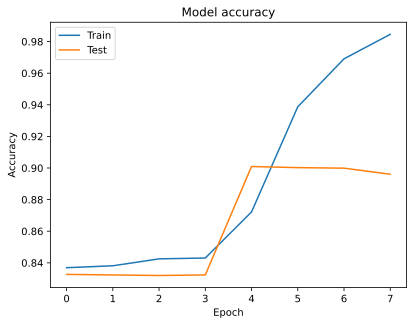

In [18]:
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

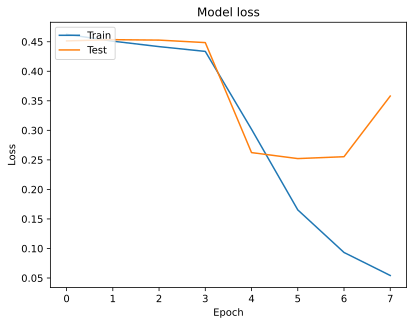

In [19]:
plt.plot(range(epochs), history.history['loss'])
plt.plot(range(epochs), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()